In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(measurements.date)).scalar()
print(most_recent_date)

2017-08-23


In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Change most recent date format 
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the date one year from the last date in data set.
twelve_months_ago = most_recent_date - pd.DateOffset(months=12)

# Remove minutes and seconds from the date
twelve_months_ago = twelve_months_ago.date()

# Print the date
print(twelve_months_ago)

2016-08-23


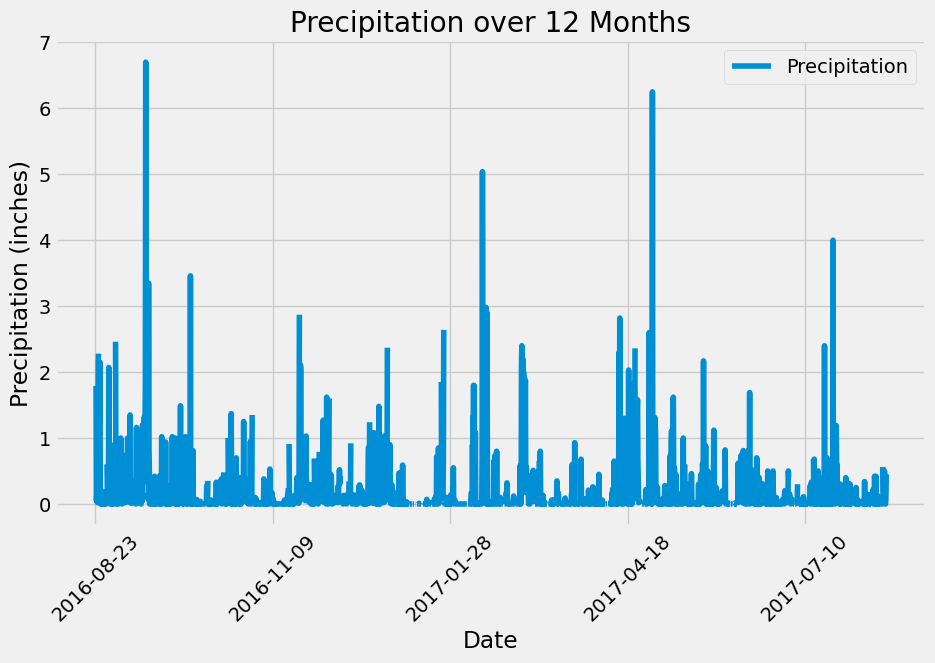

In [ ]:

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(measurements.date, measurements.prcp).filter(measurements.date >= twelve_months_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precip_df = precip_df.sort_values(by='Date', ascending=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x='Date', y='Precipitation', kind='line', figsize=(10, 6))

plt.title("Precipitation over 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.xticks(rotation=45)

plt.savefig('precip_line_chart.png')

plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_summary_stats = precip_df['Precipitation'].describe()
precip_summary_stats

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
stations_count = session.query(measurements.station).count()
stations_count

19550

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# # List the stations and their counts in descending order.
most_active_stations = session.query(measurements.station, func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Get the id for the most active station
most_active_station_id = most_active_stations[0][0]
most_active_station_id

'USC00519281'

In [43]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_low_high_avg = session.query(
    func.min(measurements.tobs),
    func.max(measurements.tobs),
    func.avg(measurements.tobs)
).filter(measurements.station == most_active_station_id).all()
temp_low_high_avg

[(54.0, 85.0, 71.66378066378067)]

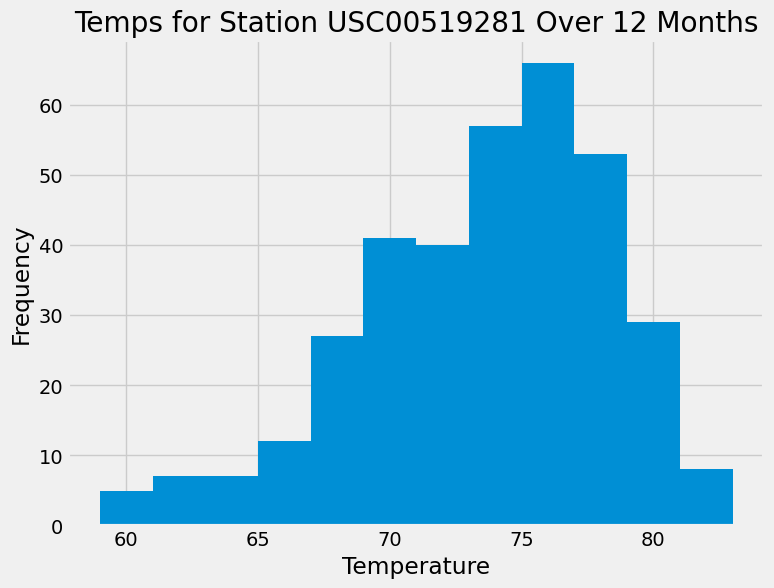

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(measurements.tobs) \
    .filter(measurements.station == most_active_station_id) \
    .filter(measurements.date >= twelve_months_ago) \
    .all()

temperatures = [temp[0] for temp in temp_data]

plt.figure(figsize=(8,6))
plt.hist(temperatures, bins=12)
plt.title(f'Temps for Station {most_active_station_id} Over 12 Months')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)

plt.savefig('temps_most_active_station.png')
plt.show()

# Close Session

In [60]:
# Close Session
session.close()